<a href="https://colab.research.google.com/github/harshsojitra007/CE132_ML_Labs/blob/main/ML_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather Dataset

[(1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1)]


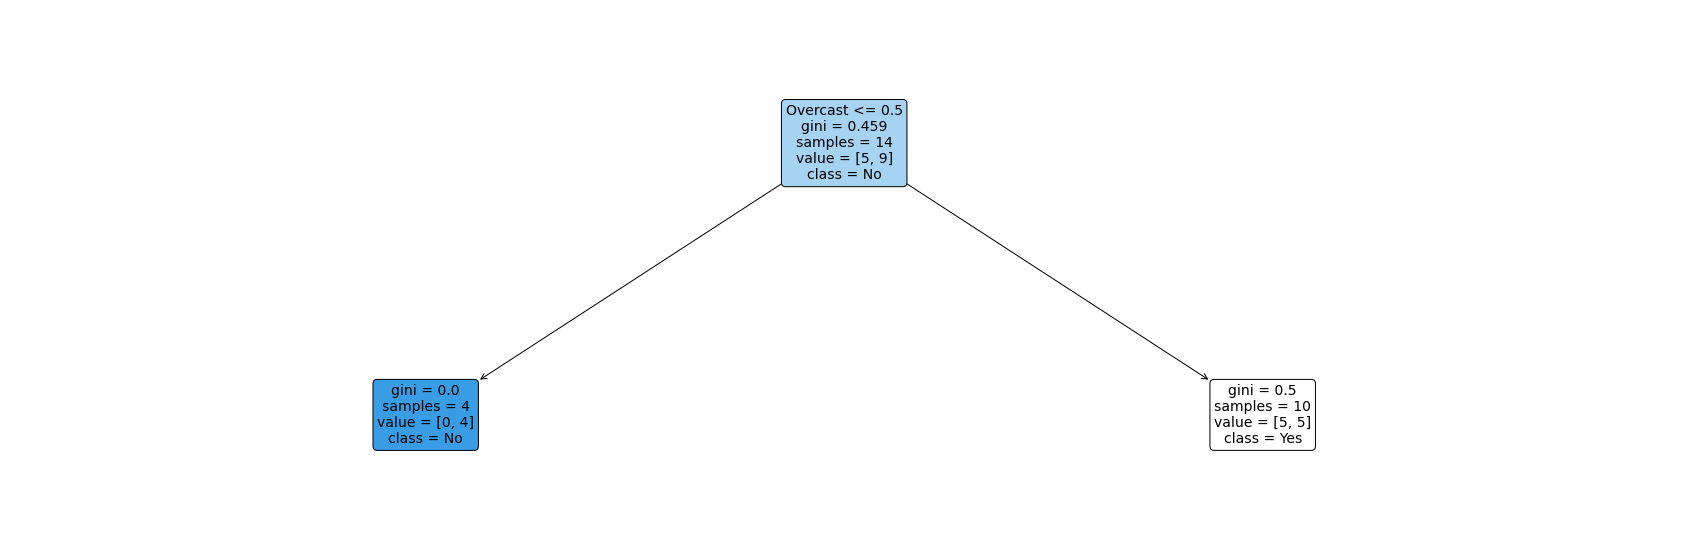

Accuracy 1.0
Precision 1.0
Recall 1.0


In [20]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

le = preprocessing.LabelEncoder()
OutlookEncoded = le.fit_transform(Outlook)
TempEncoded = le.fit_transform(Temperature)
HumidityEncoded = le.fit_transform(Humidity)
WindEncoded = le.fit_transform(Wind)
PlayEncoded = le.fit_transform(Play)

features = list(zip(OutlookEncoded, TempEncoded, HumidityEncoded, WindEncoded))
print(features)
feature_names = list(['Overcast', 'Rainy', 'Sunny'])

label = list(zip(PlayEncoded))
label_names = list(['Yes', 'No'])

model = DecisionTreeClassifier(max_leaf_nodes=2)
model.fit(features, label)

plt.figure(figsize=(30,10))

a = tree.plot_tree(model, feature_names=feature_names, class_names=label_names, rounded = True, filled = True, fontsize=14)

plt.show()

trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, label, test_size=0.05)
output = []

output = model.predict(testFeatures)

print('Accuracy {}'.format(accuracy_score(testLabels, output)))
print('Precision {}'.format(precision_score(testLabels, output)))
print('Recall {}'.format(recall_score(testLabels, output)))

Decision Tree with Iris Dataset

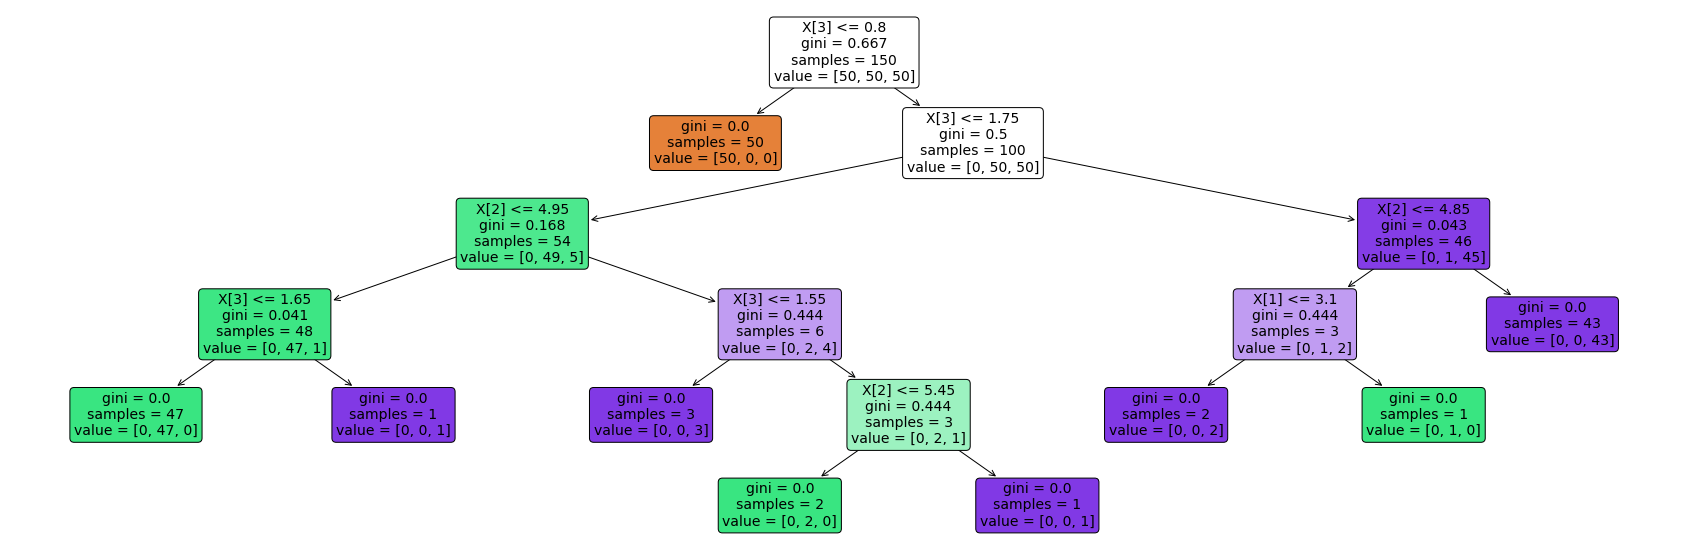

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris
data = load_iris()

features = np.array(data.data)
labels = np.array(data.target)

model = DecisionTreeClassifier()
model.fit(features, labels)

plt.figure(figsize=(30,10))

a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)

plt.show()

Iris with Pre-Pruning

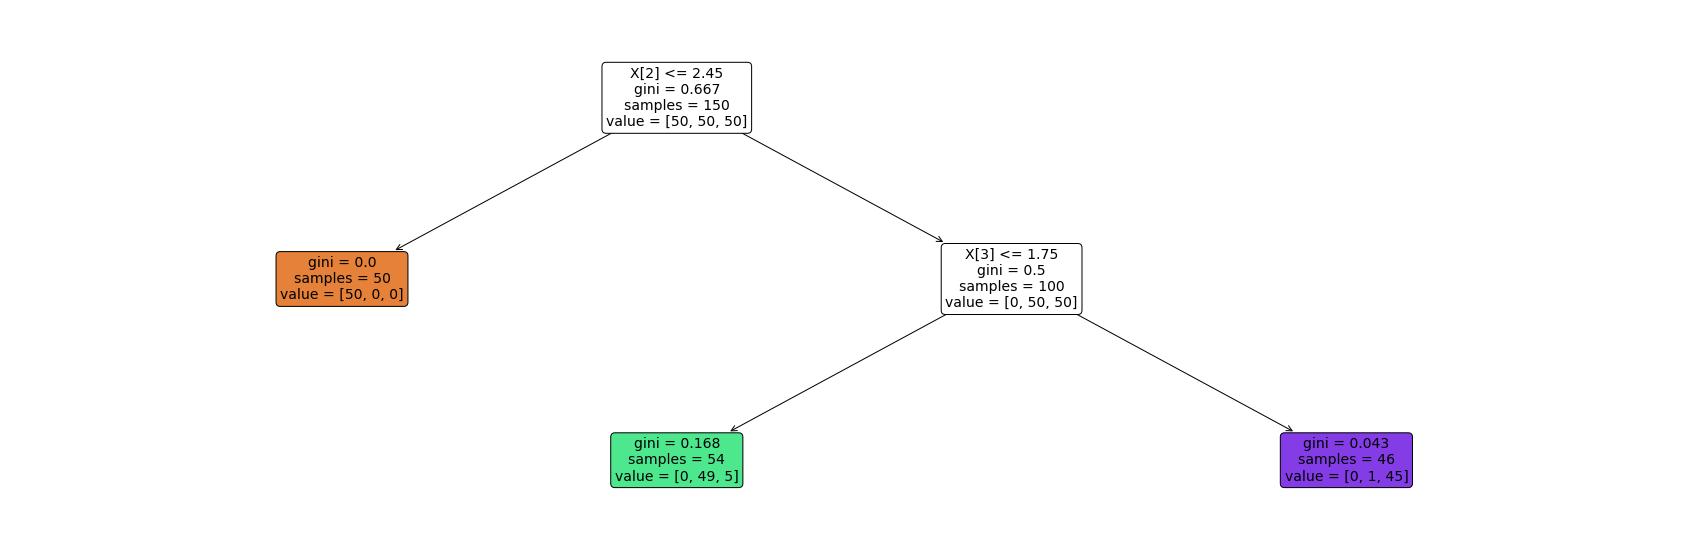

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris
data = load_iris()

features = np.array(data.data)
labels = np.array(data.target)

model = DecisionTreeClassifier(max_leaf_nodes=3)
model.fit(features, labels)

plt.figure(figsize=(30,10))

a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)

plt.show()

Iris with Post-Pruning


For Training Data



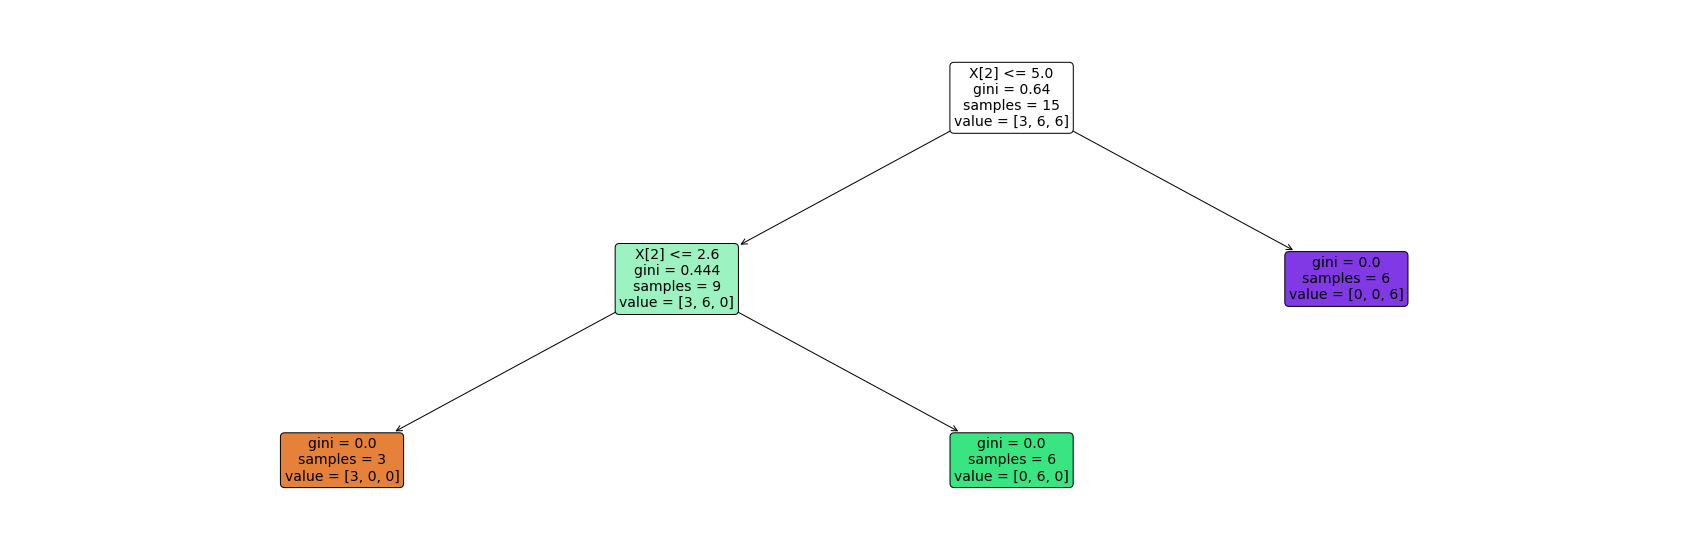

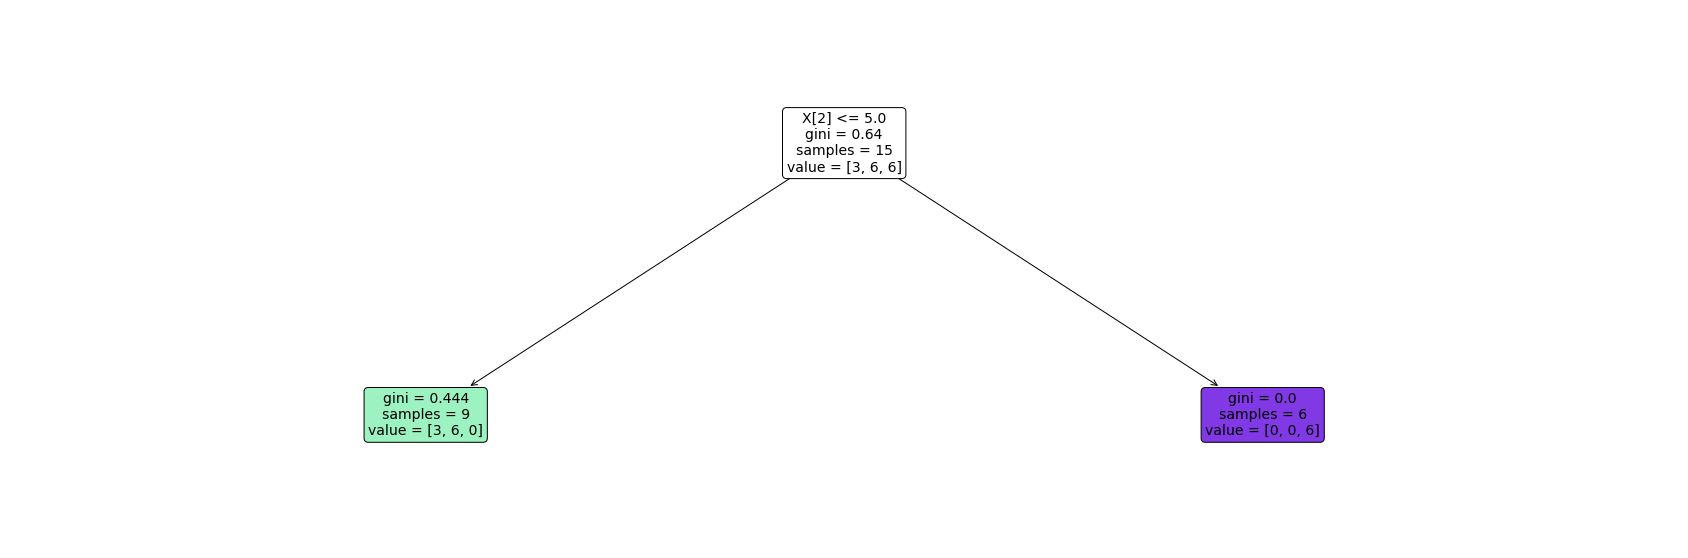

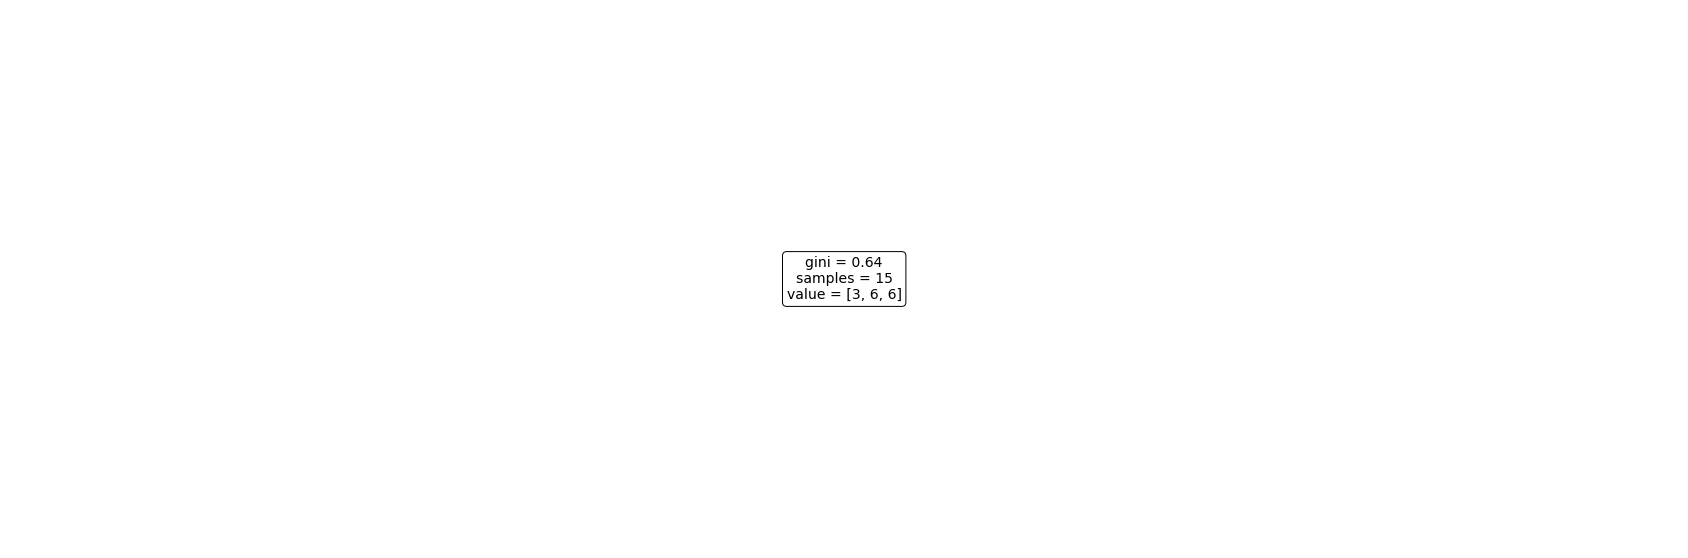


For Test Data



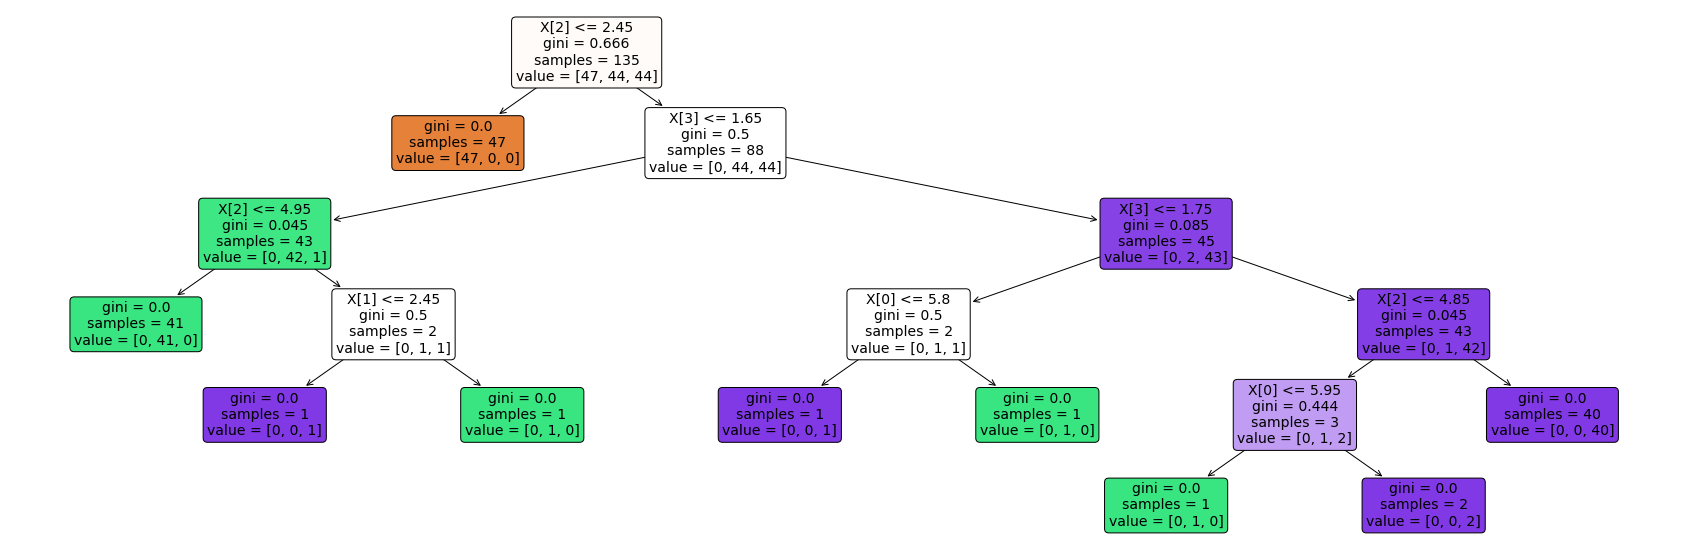

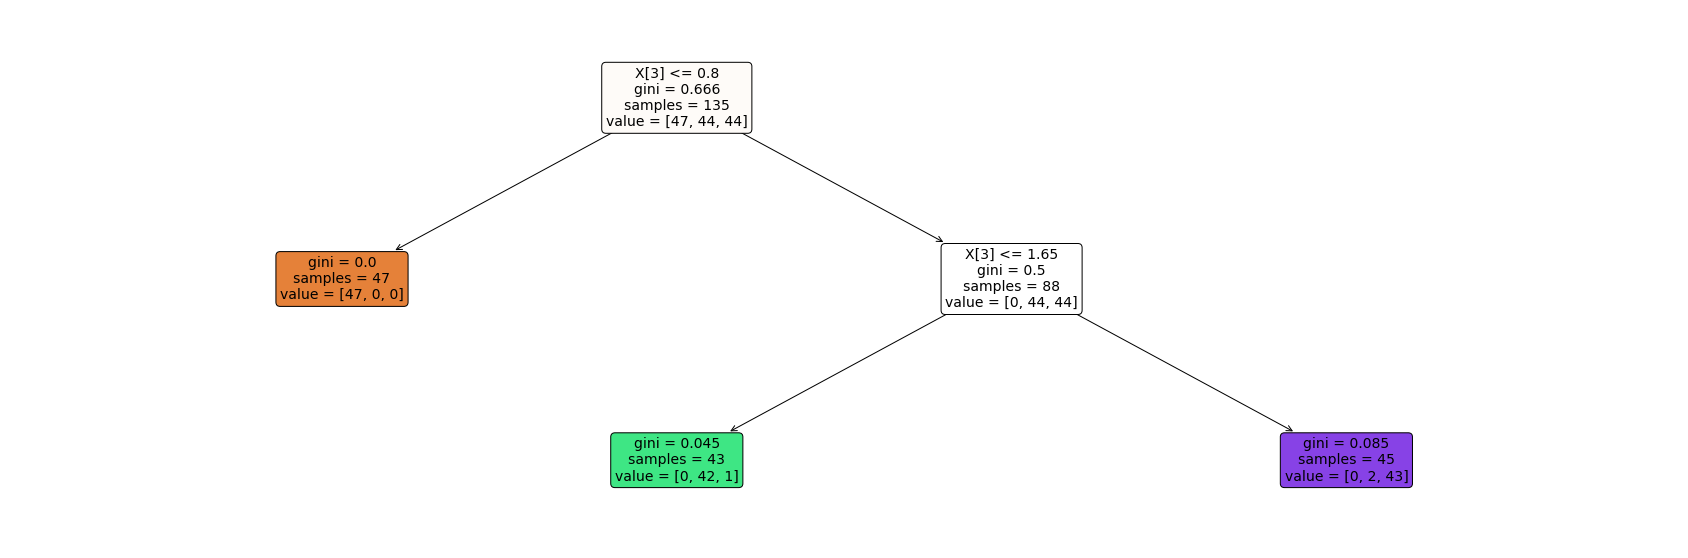

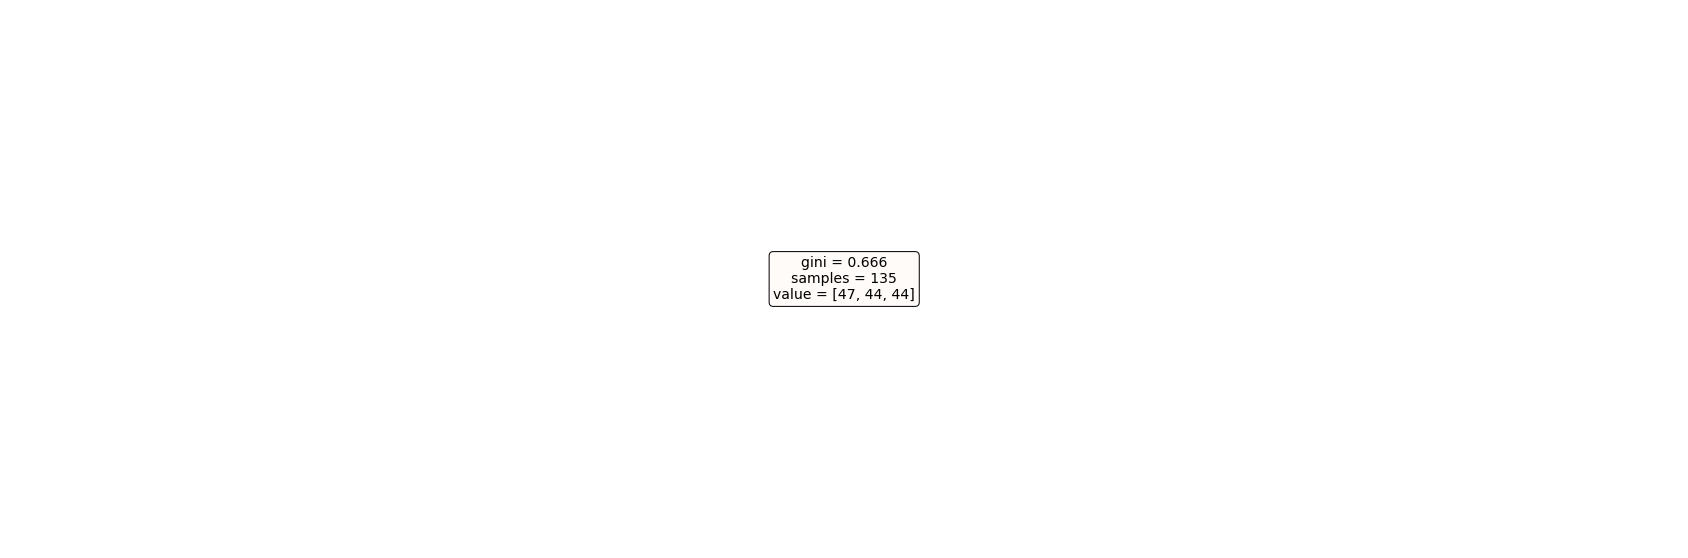

In [ ]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

from sklearn.datasets import load_iris

_feature, _label = load_iris(return_X_y=True)
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(_feature, _label, test_size = 0.9, random_state=1)

data = load_iris()

features = np.array(data.data)
labels = np.array(data.target)

model = DecisionTreeClassifier()

path = model.cost_complexity_pruning_path(trainFeatures, trainLabels)
alphas = path.ccp_alphas

print("\nFor Training Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(trainFeatures, trainLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()

print("\nFor Test Data\n")
models = []
for alpha in alphas:
  model = DecisionTreeClassifier(ccp_alpha=alpha)
  model.fit(testFeatures, testLabels)
  models.append(model)

  plt.figure(figsize=(30,10))
  a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)
  plt.show()

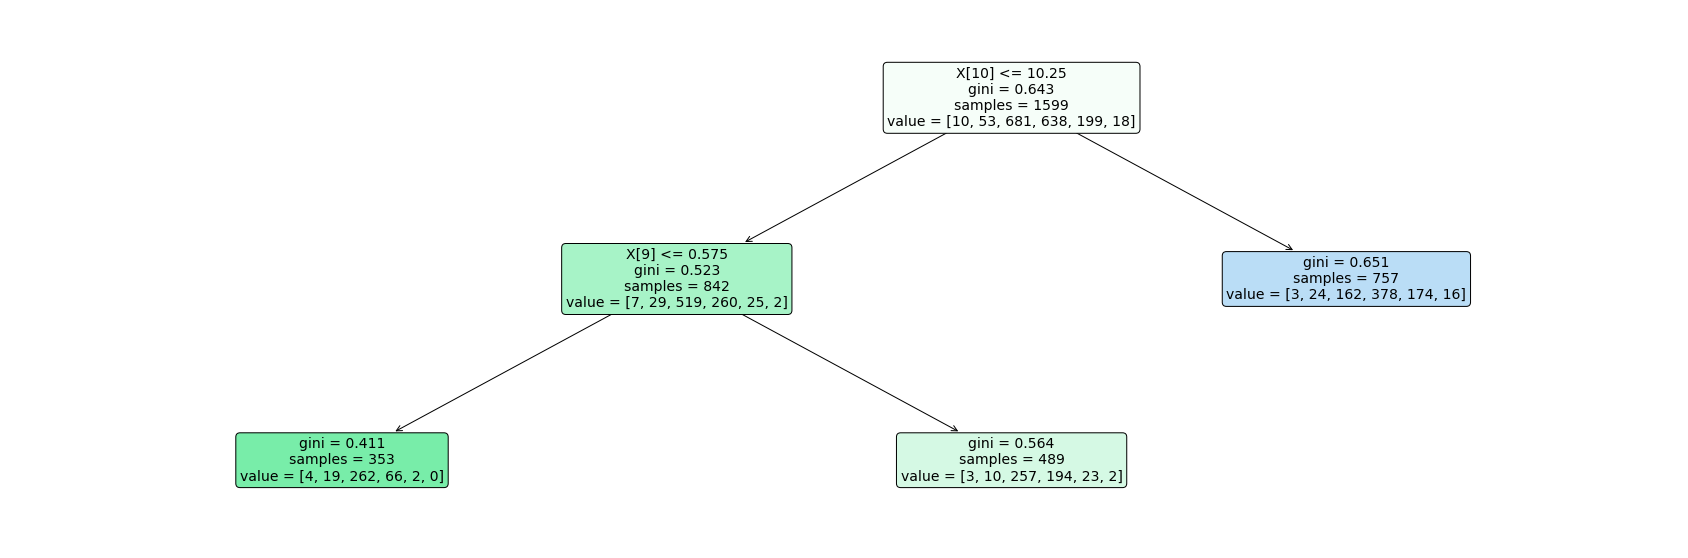

Accuracy 0.5569852941176471
Precision 0.4659861428373966
Recall 0.5569852941176471


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality_red.csv")
labels = data['quality']
features = data.drop('quality', axis=1)

trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(features, labels, test_size = 0.34, random_state=132)
model = DecisionTreeClassifier(max_leaf_nodes=3)
model.fit(features, labels)

plt.figure(figsize=(30,10))

a = tree.plot_tree(model, rounded = True, filled = True, fontsize=14)

plt.show()

output = model.predict(testFeatures)

print('Accuracy {}'.format(accuracy_score(testLabels, output)))
print('Precision {}'.format(precision_score(testLabels, output, average='weighted')))
print('Recall {}'.format(recall_score(testLabels, output, average='weighted')))